<a href="https://colab.research.google.com/github/dtnovak26/ME239/blob/homeworkUploads/Homework/ME239_HW05_novak104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(lecture05:homework)=
# Homework 5

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:** Drew
+ **Last Name:** Novak
+ **Email:** novak104@purdue.edu

Again, let me set you up with some code for plotting:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')

/tmp/ipython-input-367591302.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'svg')


## Problem 1 - Analysis of experimental srtess-strain curves of alluminum 6061-T651

You are going to analyze the dataset collected by {cite}`AAKASH2019104085`.
They perform two types of experiments.
We are going to focus on the "uniaxial tension experiment."
This is what it is all about:
+ They took several speciments of alluminum 6061-T651 ([a high-temperature alluminum alloy](https://en.wikipedia.org/wiki/6061_aluminium_alloy)).
+ The shape of these speciments is like this:

```{figure} https://ars.els-cdn.com/content/image/1-s2.0-S2352340919304391-gr1_lrg.jpg
---
height: 300px
name: directive-fig
---
Geometry of the uniaxial tension specimen.
```
+ They mounted the speciment (using the holes you see on the sides) on a machine that applies tension:

```{figure} https://ars.els-cdn.com/content/image/1-s2.0-S2352340919304391-gr5_lrg.jpg
---
height: 300px
name: directive-fig2
---
The mounted specimen.
```
+ They controlled the temperature of the specimen.
+ They applied tension gradually until the speciment broke, recorging at each step the strain (% change in length) and the stress (force per cross section area in MPa - megaPascal).

I suggest that you skim through the paper if you want to understand more about the details of the experiment.
Measuring the strains and stresses is not as straightforward as it sounds...

Our goal is to download the data, and for a fixed temperature, create a model for the stress-strain relation.
We are going to do some of the low level stuff.
But, I am going to guide you through this.

+ First, download the complete zipped data from [here](https://data.mendeley.com/datasets/rd6jm9tyb6/2) and unzip it in the directory of your Jupyter notebook.
You have two options. Either do it mannually as we did in {ref}`lecture03:homework` or run the code segment below to do it from this Jupyter notebook:

In [ ]:
# follow redirects (-L), use server's filename (-J), and write to that name (-O)
!curl -L -J -O 'https://data.mendeley.com/public-files/datasets/rd6jm9tyb6/files/559cd828-c044-418a-837c-35ce161c02ab/file_downloaded'

# sanity check: is it actually a zip?
!ls -lh
!file ./*

# unzip whatever came down (often there’s exactly one .zip)
!unzip -o *.zip

# if there are nested zips, expand them too
!unzip -o "*.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   134  100   134    0     0    458      0 --:--:-- --:--:-- --:--:--   458
100 2230k  100 2230k    0     0  1869k      0  0:00:01  0:00:01 --:--:-- 1869k
total 2.2M
drwxr-xr-x 1 root root 4.0K Sep 30 13:39 sample_data
-rw-r--r-- 1 root root 2.2M Oct  2 02:29 stress-strain-curves-of-aluminum-6061-t651-from-9-lots-at-6-temperatures-under-uniaxial-and-plain-strain-tension.zip
./sample_data:                                                                                                          directory
./stress-strain-curves-of-aluminum-6061-t651-from-9-lots-at-6-temperatures-under-uniaxial-and-plain-strain-tension.zip: Zip archive data, at least v2.0 to extract, compression method=deflate
Archive:  stress-strain-curves-of-aluminum-6061-t651-from-9-lots-at-6-temperatures-under-uniaxial-and-plain-strain-tension.zip
  inflating: P

+ Now read the data description [here](https://data.mendeley.com/datasets/rd6jm9tyb6/2) very carefully and find a filename that contains data from a uniaxial tension test of 200 degrees C. There multiple files that fit this description. Just pick one of them.

In [ ]:
filename = 'T_200_A_1_094_041_14.csv' # Picked a random one at 200C within the A Range
print('The file I picked is: ', filename)

The file I picked is:  T_200_A_1_094_041_14.csv


+ Load the file in a dataframe and print it.

In [ ]:
import pandas as pd # Import Pandas for data analyzation

data = pd.read_csv('T_200_A_1_094_041_14.csv') # Getting data from filename (using variable for redundancy)

+ Plot the stress as a function of the strain. Please label your axes properly.

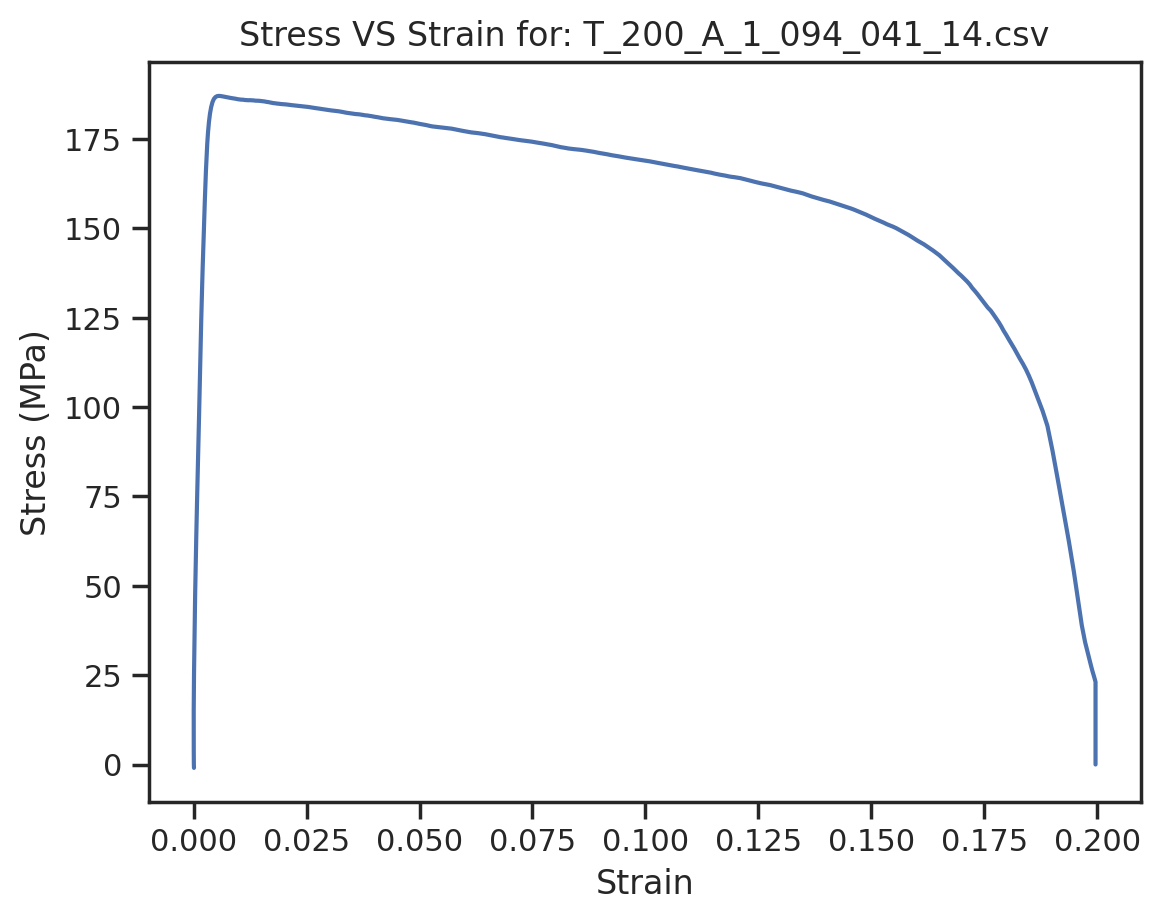

In [ ]:
import matplotlib.pyplot as plt

# Set up the plot using matplotlib, set up labels as well.
fig, stressStrain = plt.subplots()
stressStrain.plot(data['Strain'], data['Stress_MPa'])
stressStrain.set_xlabel('Strain') # Units for this are weird (Percent change in length?)
stressStrain.set_ylabel('Stress (MPa)')
stressStrain.set_title(f'Stress VS Strain for: {filename}')
plt.show()

# your code here

+ The [ultimate tensile strength](https://en.wikipedia.org/wiki/Ultimate_tensile_strength) (or just "the strength") of a material is the maximum stress that develops under tension before the material breaks. What is the strength of this alluminum alloy? Please, provide your answer below using the `print()` function with a precision of 2 decimal points. How does your answer compare with the strength range for allumunum alloys reported in [wikipedia](https://en.wikipedia.org/wiki/6061_aluminium_alloy)?

In [ ]:
# Considered using F-Strings
print('The maximum stress or strength of this alluminum alloy is %.2f MPa' % max(data['Stress_MPa']))

The maximum stress or strength of this alluminum alloy is 187.06 MPa


+ Let's zoom in to low strains. Plot the first 200 observations points of the stress-strain curve.

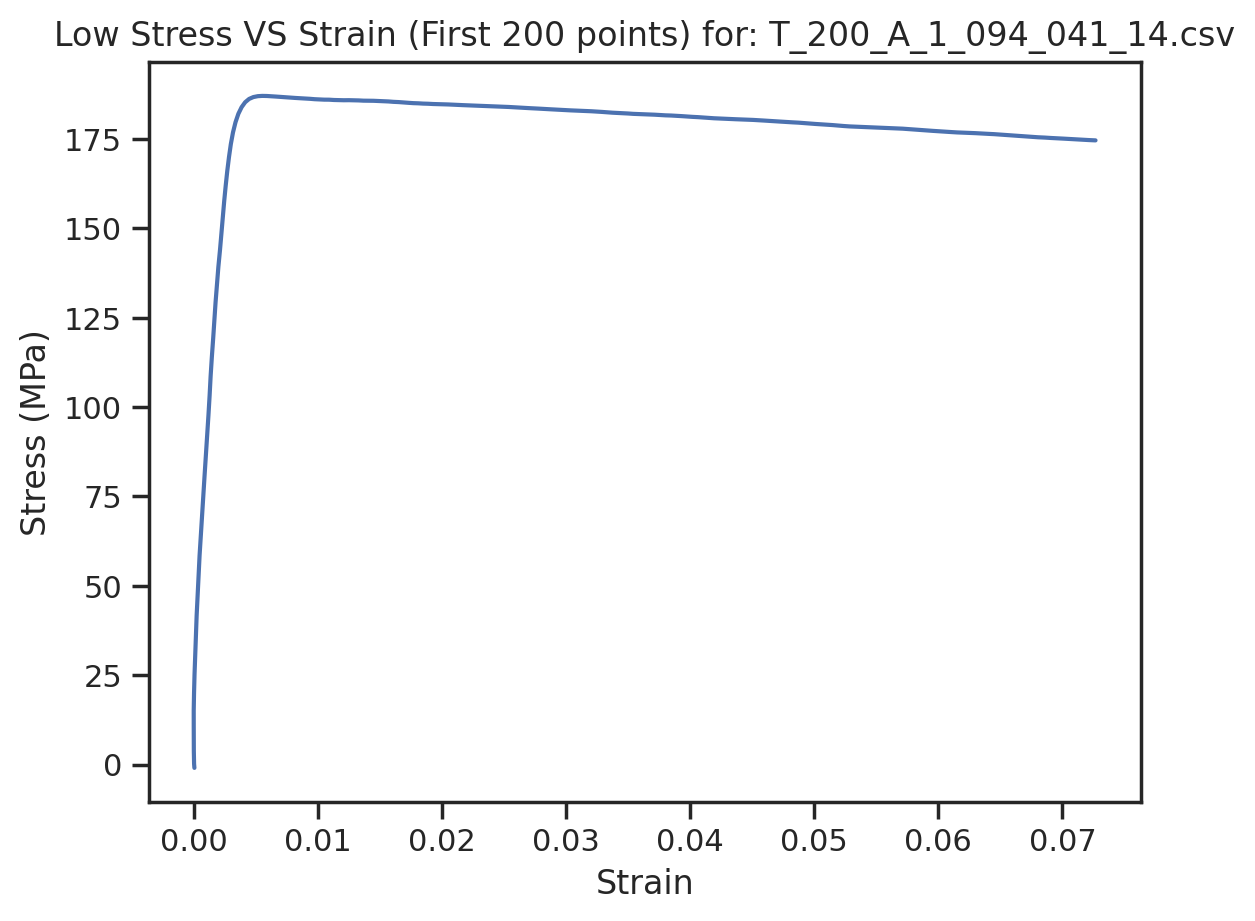

In [ ]:
# plotting the lower (first 200) observation points of the stress-strain curve

fig, lowStrain = plt.subplots()
lowStrain.plot(data['Strain'][0:200], data['Stress_MPa'][0:200])
lowStrain.set_xlabel('Strain')
lowStrain.set_ylabel('Stress (MPa)')
lowStrain.set_title(f'Low Stress VS Strain (First 200 points) for: {filename}')
plt.show()

+ Observe that the experimental data are behaving strangely at very small strains. As a matter of fact, we are getting a few negative strains at the beginning.
Let's throw these observartions away. Start by finding the index $i$ for which `df['Strain'][i]` becomes positive for the first time. You can do this by a visual inspection of `df['Strain'][:30]`.

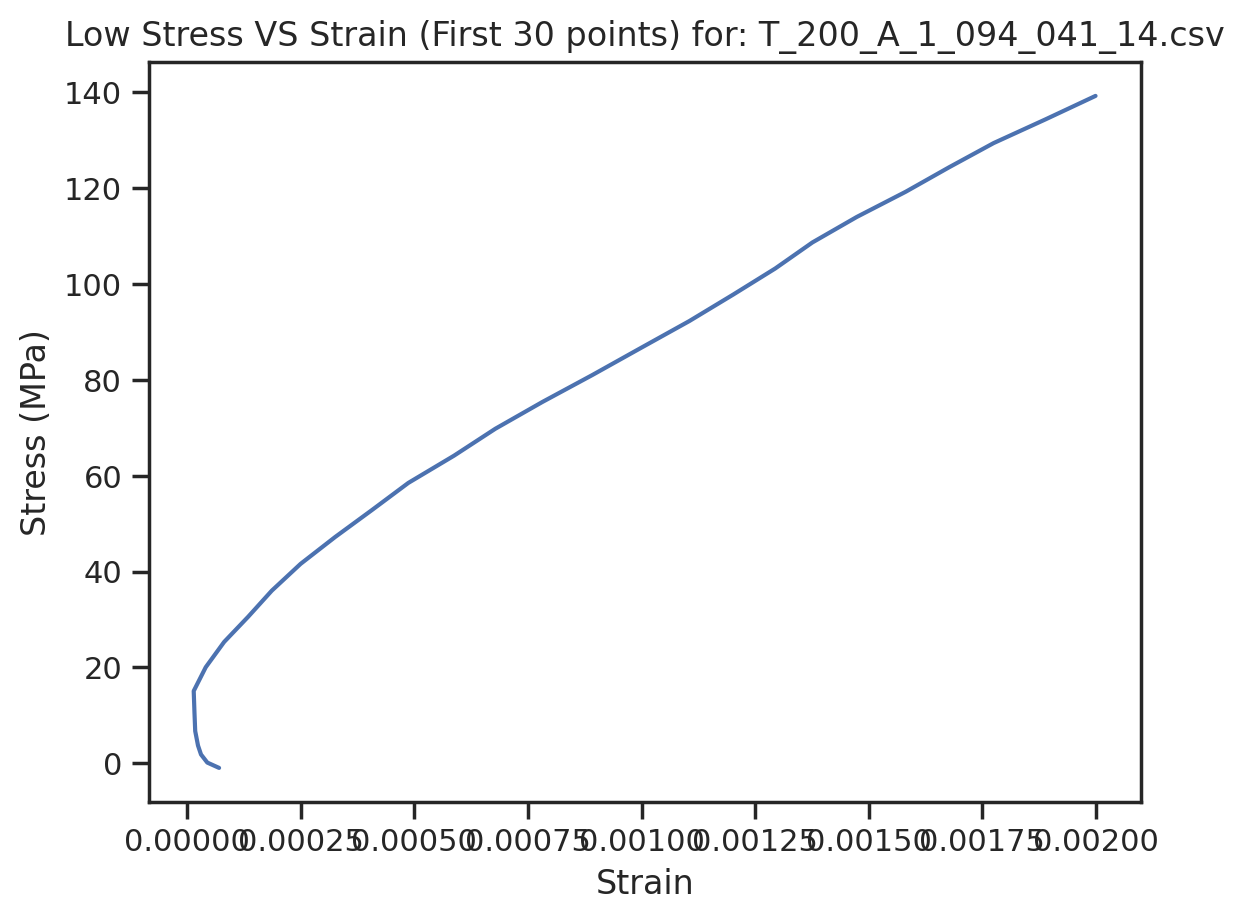

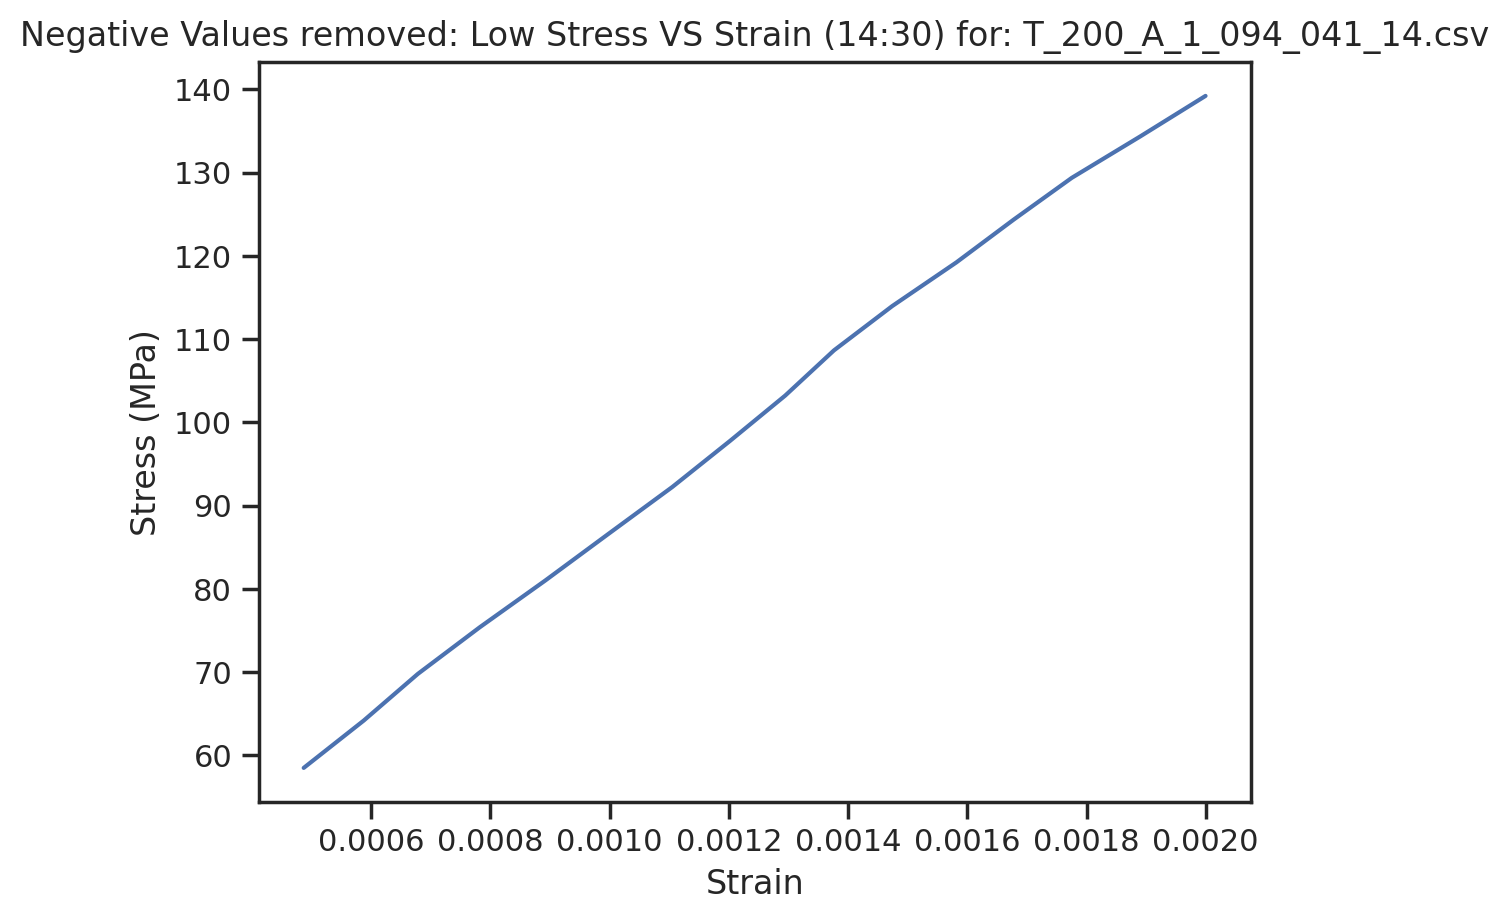

In [ ]:
#ORIGINAL CHECK - NON VISUAL (UNUSED NOW)
#sample = -1 #value we are testing
#retIndex = 0
#while(sample < 0):
#  print(data['Strain'][retIndex])
#  sample = data['Strain'][retIndex]
#  retIndex += 1
# Not sure if this is just the data I chose but df['Strain] is never negative?
#print(f'Index i where Strain is positive for the first time is: {retIndex}')

#Verify visually by plotting all values from 0 to 30
fig, lowStrain = plt.subplots()
lowStrain.plot(data['Strain'][0:30], data['Stress_MPa'][0:30])
lowStrain.set_xlabel('Strain')
lowStrain.set_ylabel('Stress (MPa)')
lowStrain.set_title(f'Low Stress VS Strain (First 30 points) for: {filename}')
plt.show()

#After reviewing output of above code, Manually went through and checked to start values to remove the negative "tail" at the start
# Found the correct value after trial and error was starting at 14 (proven by approx, linear)
fig, lowStrain = plt.subplots()
lowStrain.plot(data['Strain'][14:30], data['Stress_MPa'][14:30])
lowStrain.set_xlabel('Strain')
lowStrain.set_ylabel('Stress (MPa)')
lowStrain.set_title(f'Negative Values removed: Low Stress VS Strain (14:30) for: {filename}')
plt.show()


+ Make a new dataframe, call it `clean_df` where you have thrown away the initial data. Then plot the first 200 observations of `clean_df`.

In [ ]:
# Based on data cleaned from above, starting at 14 to the end is cleaned (removed negative)
clean_df = data[14:]

+ Observe that initially the stress-strain relation is linear. This is the so-called *elastic regime*.
If you deform the material within this regime, it will return to its undeformed state without any permanent deformation effects.
If you deform the material beyond the elastic regime, then you start having what we call *plasticity*.
We are now going to focus exclusively on the linear regime.
Find an index $j$ so that `clean_df[:j]` is fully within the linear regime.
Make a new dataframe, say `linear_df` containing only these data.
You should probably pick $j$ by visual inspection.
And it is not important to pick the maximum $j$ with this property.
Just find one.

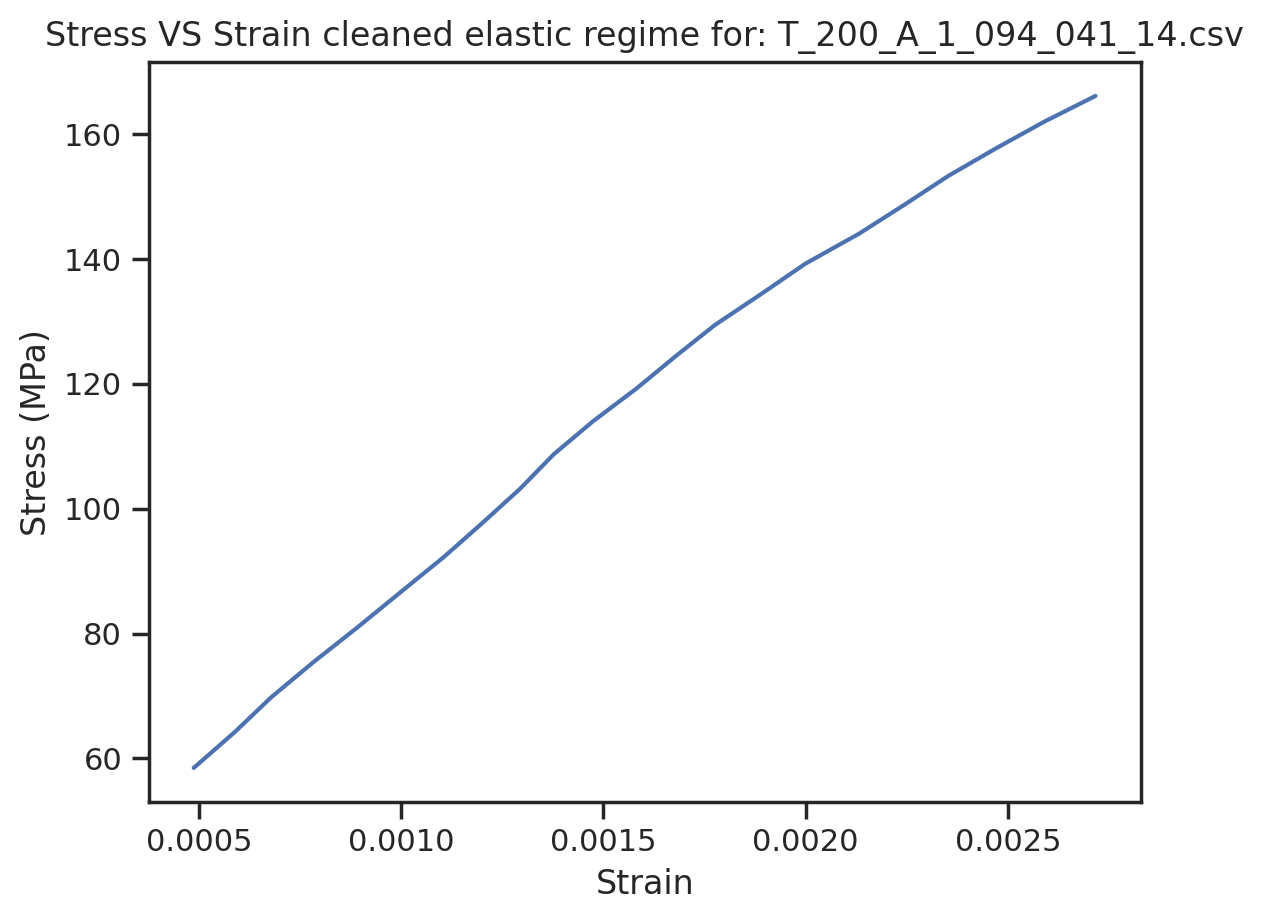

In [ ]:
# define value j as the end of the linear regime
j = 22 #22 looks approx. correct, slight curve at the top but follows linear relationship well
linear_df = clean_df[:j]

# Plot data to test (see if linear relationship is true)
fig, elasticReg = plt.subplots()
elasticReg.plot(linear_df['Strain'], linear_df['Stress_MPa'])
elasticReg.set_xlabel('Strain')
elasticReg.set_ylabel('Stress (MPa)')
elasticReg.set_title(f'Stress VS Strain cleaned elastic regime for: {filename}')
plt.show()

+ In the elastic regime, the stress $\sigma$ is a linear function of the strain $\epsilon$:

$$
\sigma = E\epsilon.
$$

The constant $E$ is called Young's modulus and it has units of GPa (GigaPascal).
Make a function `sigma(epsilon, E)` that calculates the stress given the strain for any Young's modulus. Properly document the docstring of your function.

In [ ]:
def sigma(epsilon, E):
  """ Calculates the stress given the strain for any Young value. based on equation
      Sigma = E*Epsilon and returns the value to the user.

  Arguments:
    epsilon    -   The strain of the measurement
    E          -   Youngs Modulus (gPa)

    Returns: The calculated stress based on equation above in description.
  """
  sig = E*epsilon
  return sig

In [ ]:
# Try your function here:
sigma(linear_df['Strain'], 68)

,Strain
14,0.033094
15,0.039934
16,0.046111
17,0.053175
18,0.060634
19,0.067871
20,0.075147
21,0.081725
22,0.088019
23,0.093588


+ If you pay close attention to the data in `linear_df` they do not cross zero.
This is due to a systematic bias in the experiment.
However, this bias is not important for calibrating Young's modulus $E$.
Only the slope of the curve is important for finding $E$.
So, let's make yet another dataframe (I promise you this is the last one) called `clean_linear_df` which removes this systematic bias.
The dataframe `clean_linear_df` should contain the same data as `linear_df` but
    + The strains should all be shifted by the minimum strain in `linear_df`. In other words, subtract from the strains in `clean_linear_df` the smallest strain in `linear_df`, i.e., subtract `linear_df['Strain'].min()`.
    + The stresses should all be shifted by the minimum stress in `linear_df`.

In [ ]:
#create the new dataframe
clean_linear_df = linear_df.copy()
#using .copy() due to strange error with pandas in setting the new set equal to the old set, had to research a bit to figure out solution.

#subtract the minimum value according to instructions
clean_linear_df['Strain'] = clean_linear_df['Strain'] - clean_linear_df['Strain'].min()

+ Use visual inspection to find a value for the Young's modulus that matches the data in `clean_linear_df`.
Hints: Remember that the stress $\sigma$ is in MPa so you will have to change the units correctly if you $E$ is expressed in GPa.

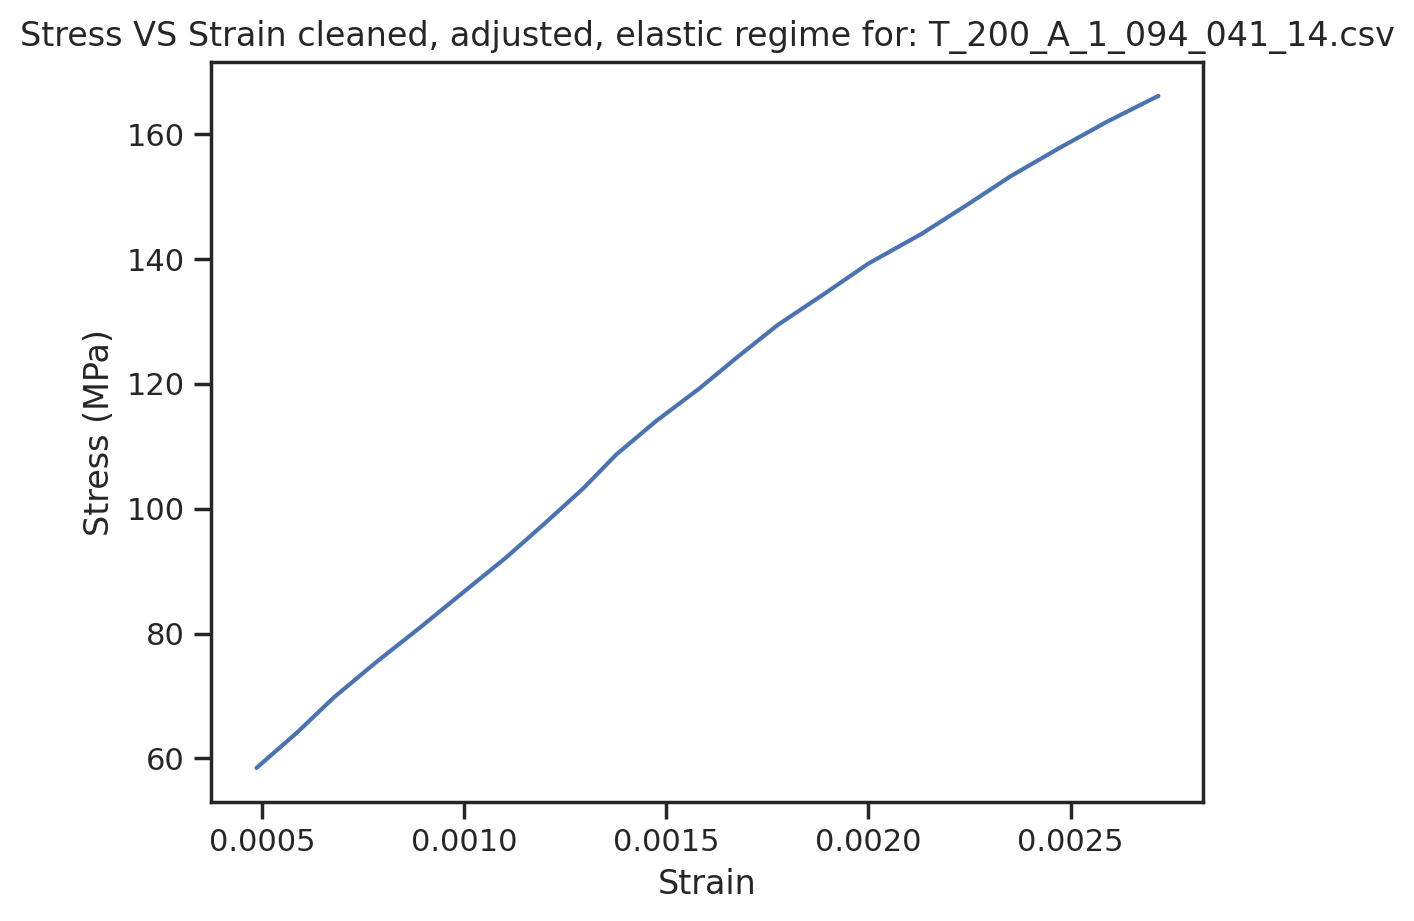

Stress visual guess: 0.08 GPa
Calculated stress: 0.08750000000000001
E guess: 175 GPa


In [ ]:
# Visual inspection
fig, cleanLin = plt.subplots()
cleanLin.plot(linear_df['Strain'], clean_linear_df['Stress_MPa'])
cleanLin.set_xlabel('Strain')
cleanLin.set_ylabel('Stress (MPa)')
cleanLin.set_title(f'Stress VS Strain cleaned, adjusted, elastic regime for: {filename}')
plt.show()

stressGuess = 80 / 1000 # convert to gPa
strainGuess = 0.0005
E_Guess = 175 # GPa

calcStress = sigma(strainGuess, E_Guess)
print(f'Stress visual guess: {stressGuess} GPa')
print(f'Calculated stress: {calcStress}')
print(f'E guess: {E_Guess} GPa')

+ How does what you found compare to the [wikipedia](https://en.wikipedia.org/wiki/6061_aluminium_alloy) reported Young's modulus for this material? Why do you think yours is lower/higher? You may want to repeat the analysis above for another experiment with lower temperature (say at room temperature).

In [ ]:
# your answer here
print("My guess is much higher than the value expected from Wikipedia by a pretty large margin. My calculation is based off of a very high temperature test that does has limited data points as well. Other limitations include a small number of data points in this specific area of the set.")
# Out of curiosity I did calculate a value by hand based off of the table for 20 C and it is much closer (around 80 GPa, Not sure why this is still off a little bit)

Run the following code to convert the notebook to a pdf. Verify that the file path to the notebook is correct.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!apt-get install inkscape texlive texlive-xetex texlive-latex-extra pandoc --quiet
!pip install pypandoc --quiet
!jupyter nbconvert --to PDF '/content/drive/MyDrive/Colab Notebooks/Homework_05_ME239_novak104.ipynb'

Mounted at /content/drive
Reading package lists...
Building dependency tree...
Reading state information...
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  aspell aspell-en dictionaries-common dvisvgm enchant-2 fig2dev
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 gawk ghostscript glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas gsfonts hunspell-en-us
  imagemagick imagemagick-6-common imagemagick-6.q16 lib2geom1.1.0
  libapache-pom-java libaspell15 libatkmm-1.6-1v5 libcairomm-1.0-1v5
  libcdr-0.1-1 libcommons-logging-java libcommons-parent-java libdbus-glib-1-2
  libdjvulibre-text libdjvulibre21 libenchant-2-2 libfftw3-double3
  libfontbox-java libglibmm-2.4-1v5 libgs9 libgs9-common libgsl27 libgslcblas0
  libgspell-1-2 libgspell-1-common libgtkmm-3.0-1v5 libhunspell-1.7-0 libidn12
  libijs-0.35 